## Use Astropy to analyze FITS images

Based on a tutorial by Lia Corrales

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

### Open the FITS file

In [2]:
fname = "HorseHead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


#### Generally, the image information is located in the PRIMARY block. 
#### The blocks are numbered and can be accessed by indexing hdu_list

In [9]:
image_data = hdu_list[0].data
header = hdu_list[0].header

Adding color class

In [26]:
#use colors.subclass(or command; e.g bold).colorname to print
#examples: print(colors.bold, colors.fg.blue, "this will be bold and blue")
#everything after this will have that format until the following command
#is given: print(colors.reset, "now, this text will be normal")

class colors:
    reset='\033[0m' #reset all colors with colors.reset
    bold='\033[01m'
    underline='\033[04m'
    strikethrough='\033[09m'
    reverse='\033[07m'
    class fg:  #foreground subclass
        black='\033[30m'
        red='\033[31m'
        green='\033[32m'
        orange='\033[33m'
        blue='\033[34m'
        purple='\033[35m'
        cyan='\033[36m'
        lightgrey='\033[37m'
        darkgrey='\033[90m'
        lightred='\033[91m'
        lightgreen='\033[92m'
        yellow='\033[93m'
        lightblue='\033[94m'
        pink='\033[95m'
        lightcyan='\033[96m'
    class bg: #background subclass
        black='\033[40m'
        red='\033[41m'
        green='\033[42m'
        orange='\033[43m'
        blue='\033[44m'
        purple='\033[45m'
        cyan='\033[46m'
        lightgrey='\033[47m'

In [27]:
print(header)

SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = '2014-01-09        '  /FITS: Creation Date                            ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                REGION  = 'ER768   '           /GSSS: Region Name                               PLATEID = 'A0JP    '           /GSSS: Plate ID                                  SCANNUM = '01      '           /GSSS: Scan Number                               DSCNDNUM= '00      '           /GSSS: De

Notice NAXIS = 2; this tells that it is a 2D array

Also notice how small the data is (BITPIX = 16)

CRPIX also assits in finding where the picture was taken

### Our data is now stored as a 2D numpy array; but how do we know the dimensions of the image?
#### We can simply look at the shape of the array. 
(Print info about image_data)

In [28]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


#### At this point, we can close the FITS file because we've stored everything we wanted to a variable.

In [29]:
hdu_list.close()

#### Shortcut: use "getdata()" to just read in the image data and close the file.

In [30]:
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


#### Let's show the data

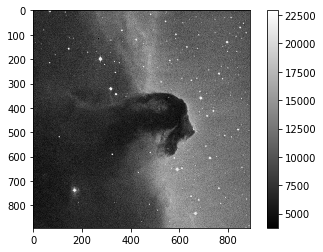

In [31]:
plt.imshow(image_data,cmap='gray')
plt.colorbar()

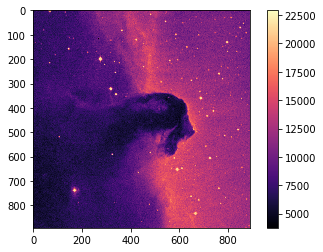

In [32]:
plt.imshow(image_data,cmap='magma')
plt.colorbar()

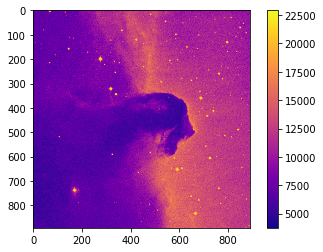

In [33]:
plt.imshow(image_data,cmap='plasma')
plt.colorbar()

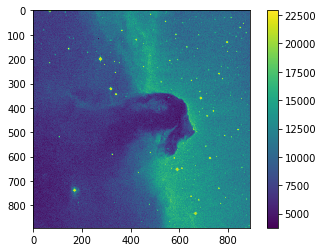

In [34]:
plt.imshow(image_data,cmap='viridis')
plt.colorbar()

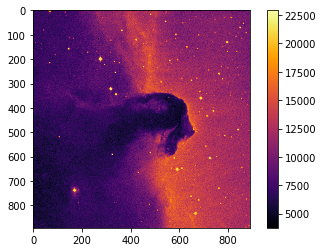

In [35]:
plt.imshow(image_data,cmap='inferno')
plt.colorbar()

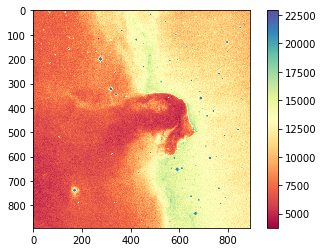

In [36]:
plt.imshow(image_data,cmap='Spectral')
plt.colorbar()

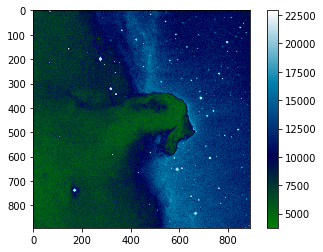

In [37]:
plt.imshow(image_data,cmap='ocean')
plt.colorbar()

more colormap options at https://matplotlib.org/examples/color/colormaps_reference.html

#### Let's get some basic statistics about our image:

In [25]:
print('Min:',np.min(image_data))
print('Max:',np.max(image_data))
print('Mean:',np.mean(image_data))
print('STdev:',np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
STdev: 3032.3927542049046


# Plotting a histogram
To make a histogram with matplotlib.pyplot.hist(), we'll need to cast the data from a 2D array to something one dimensional
In this case, let's use the ndarray.flatten() to return a 1D numpy array

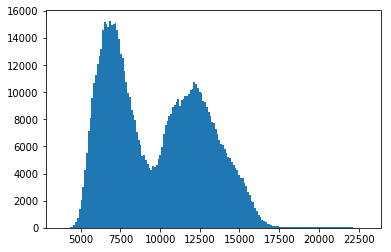

In [38]:
histogram = plt.hist(image_data.flatten(),bins='auto')

### Displaying the image with a logarithmic scale
What if we want to use a log color scale? 
To do so, we can load the LogNorm object from matplotlib.

In [39]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

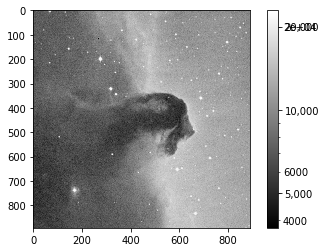

In [40]:
plt.imshow(image_data,cmap='gray',norm=LogNorm())

#choose the tick marks based on the histogram above
cbar=plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

### Stacking images
Since the noise in an image results from a random process, we use stacking of seperate images to improve the signal to noise ratio of objects we observe. Here we are going to stack 5 images of M13 taken with a 10 inch telescope.

In [41]:
#make a list of filenames
image_list = ['M13_blue_0001.fits','M13_blue_0002.fits','M13_blue_0003.fits',\
              'M13_blue_0004.fits','M13_blue_0005.fits',]

In [42]:
#make an array of images from the list of images
image_concat = [fits.getdata(image) for image in image_list]

In [43]:
#sum the images together
final_image = np.sum(image_concat,axis=0)

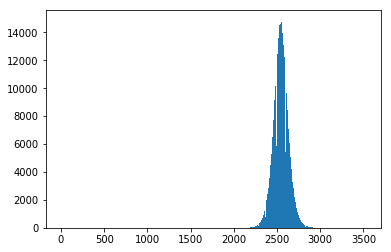

In [44]:
#plot a histogram of the image pixel values
image_hist = plt.hist(final_image.flatten(),bins='auto')

(0, 3500)

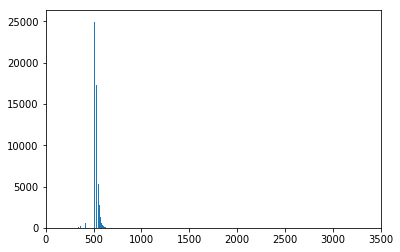

In [46]:
image_hist = plt.hist(image_concat[0].flatten(),bins='auto')
plt.xlim([0,3500])

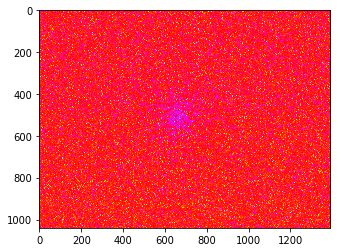

In [56]:
plt.imshow(image_concat[0],cmap='gist_ncar')

We'll use the keywords vmin and vmax to set limits on the color scaling for imshow

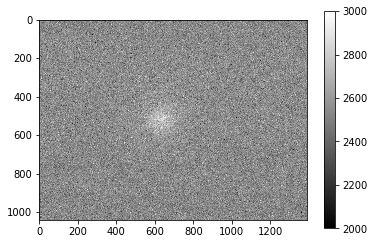

In [48]:
plt.imshow(final_image,cmap='gray',vmin=2E3,vmax=3E3)
plt.colorbar()

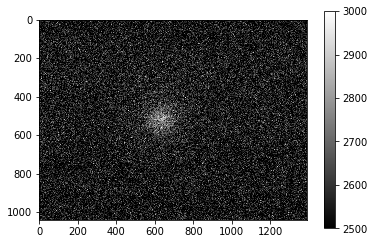

In [57]:
plt.imshow(final_image,cmap='gray',vmin=2.5E3,vmax=3E3)
plt.colorbar()

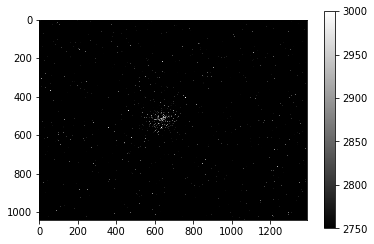

In [58]:
plt.imshow(final_image,cmap='gray',vmin=2.75E3,vmax=3E3)
plt.colorbar()

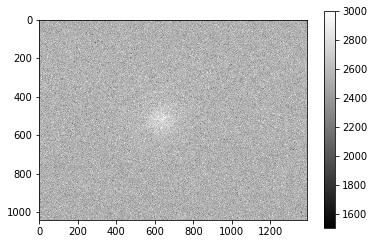

In [59]:
plt.imshow(final_image,cmap='gray',vmin=1.5E3,vmax=3E3)
plt.colorbar()

### Writing a new FITS file
We can easily do this with the writeto() method
Warning: you'll receive an error if the file you are trying to write already exists. That's why we've set clobber=True

In [60]:
outfile = 'stacked_M13_blue.fits'
hdu     = fits.PrimaryHDU(final_image)
hdu.writeto(outfile,overwrite=True)

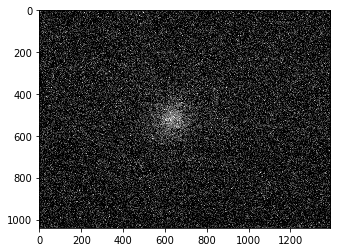

In [61]:
hdu_list = fits.open(outfile)
header   = hdu_list[0].header
data     = hdu_list[0].data
plt.imshow(data,cmap='gray',vmin=2.5e3,vmax=3e3)

In [62]:
print(header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                   64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1392                                                  NAXIS2  =                 1040                                                  EXTEND  =                    T                                                  BSCALE  =                    1                                                  BZERO   =  9223372036854775808                                                  END                                                                                                                                                                                                                                                                                                                                                                     